In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('DATA/cancer_classification.csv')

In [3]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


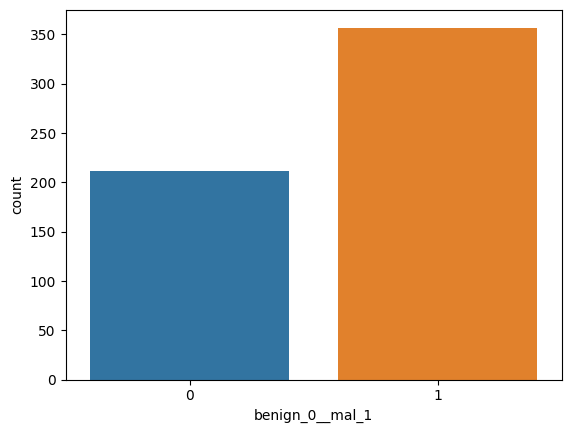

In [5]:
sns.countplot(x='benign_0__mal_1',data=data);

<Axes: >

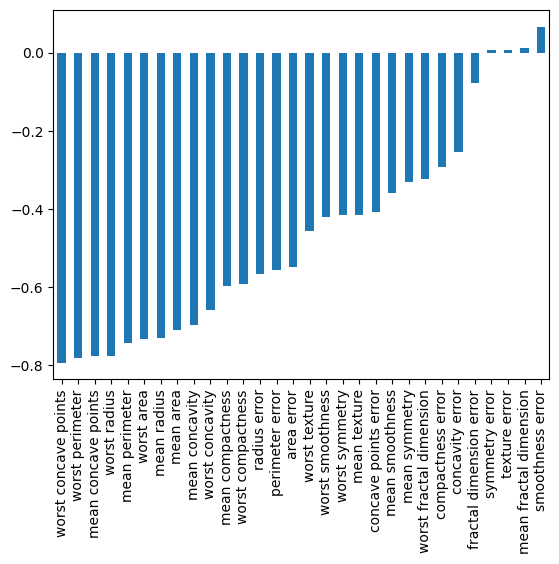

In [6]:
data.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [7]:
x = data.drop('benign_0__mal_1', axis=1).values
y = data['benign_0__mal_1'].values

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [12]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [13]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=600)

Epoch 1/600
15/15 [==============================] - 2s 24ms/step - loss: 0.6649 - val_loss: 0.6319
Epoch 2/600
15/15 [==============================] - 0s 6ms/step - loss: 0.6199 - val_loss: 0.5798
Epoch 3/600
15/15 [==============================] - 0s 6ms/step - loss: 0.5653 - val_loss: 0.5170
Epoch 4/600
15/15 [==============================] - 0s 7ms/step - loss: 0.5097 - val_loss: 0.4547
Epoch 5/600
15/15 [==============================] - 0s 7ms/step - loss: 0.4520 - val_loss: 0.3962
Epoch 6/600
15/15 [==============================] - 0s 7ms/step - loss: 0.3988 - val_loss: 0.3442
Epoch 7/600
15/15 [==============================] - 0s 6ms/step - loss: 0.3534 - val_loss: 0.2997
Epoch 8/600
15/15 [==============================] - 0s 7ms/step - loss: 0.3122 - val_loss: 0.2613
Epoch 9/600
15/15 [==============================] - 0s 7ms/step - loss: 0.2793 - val_loss: 0.2297
Epoch 10/600
15/15 [==============================] - 0s 5ms/step - loss: 0.2550 - val_loss: 0.2057
Epoch 11

In [14]:
loss = pd.DataFrame(model.history.history)

<Axes: >

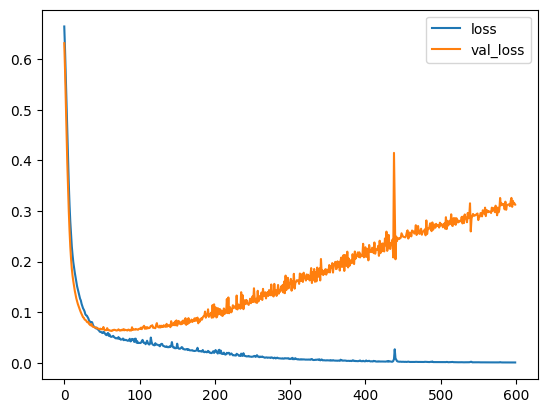

In [15]:
loss.plot()

In [16]:
prediction = (model.predict(x_test) > 0.5).astype('int32')

4/4 [==============================] - 0s 4ms/step


In [17]:
print(classification_report(y_pred=prediction, y_true=y_test))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.97      0.93      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



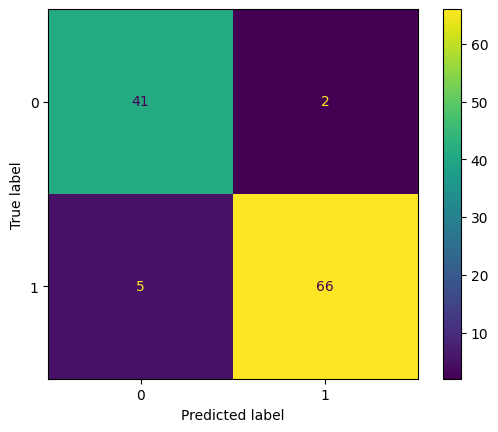

In [18]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=prediction)

In [19]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
# help(EarlyStopping)

In [22]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [23]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=600, verbose=1,callbacks=[early_stop])

Epoch 1/600
15/15 [==============================] - 3s 37ms/step - loss: 0.6920 - val_loss: 0.6697
Epoch 2/600
15/15 [==============================] - 0s 8ms/step - loss: 0.6574 - val_loss: 0.6322
Epoch 3/600
15/15 [==============================] - 0s 6ms/step - loss: 0.6229 - val_loss: 0.5920
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5862 - val_loss: 0.5507
Epoch 5/600
15/15 [==============================] - 0s 7ms/step - loss: 0.5467 - val_loss: 0.5031
Epoch 6/600
15/15 [==============================] - 0s 6ms/step - loss: 0.4961 - val_loss: 0.4488
Epoch 7/600
15/15 [==============================] - 0s 5ms/step - loss: 0.4424 - val_loss: 0.3919
Epoch 8/600
15/15 [==============================] - 0s 6ms/step - loss: 0.3905 - val_loss: 0.3398
Epoch 9/600
15/15 [==============================] - 0s 6ms/step - loss: 0.3436 - val_loss: 0.2958
Epoch 10/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3056 - val_loss: 0.2611
Epoch 11

In [24]:
loss = pd.DataFrame(model.history.history)

<Axes: >

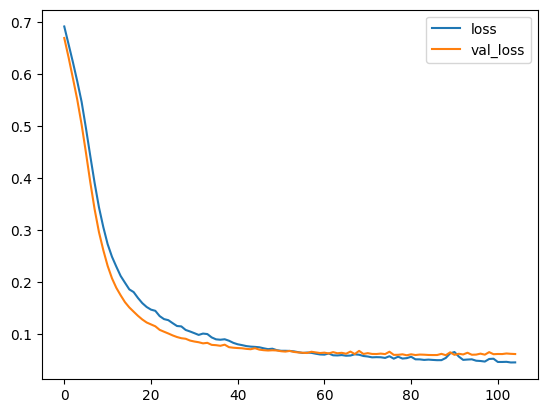

In [25]:
loss.plot()

In [26]:
prediction = (model.predict(x_test) > 0.5).astype('int32')

4/4 [==============================] - 0s 2ms/step


In [27]:
print(classification_report(y_pred=prediction, y_true=y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



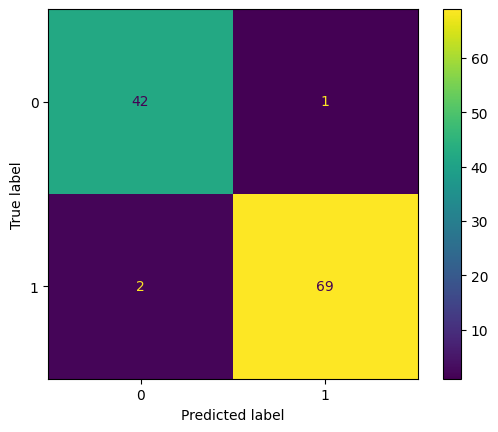

In [28]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=prediction)

In [29]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
model.fit(x=x_train,y=y_train, epochs=600, validation_data=(x_test, y_test), 
          verbose=1, callbacks=[early_stop])

Epoch 1/600
15/15 [==============================] - 2s 21ms/step - loss: 0.6787 - val_loss: 0.6557
Epoch 2/600
15/15 [==============================] - 0s 7ms/step - loss: 0.6716 - val_loss: 0.6246
Epoch 3/600
15/15 [==============================] - 0s 7ms/step - loss: 0.6495 - val_loss: 0.5981
Epoch 4/600
15/15 [==============================] - 0s 6ms/step - loss: 0.6143 - val_loss: 0.5724
Epoch 5/600
15/15 [==============================] - 0s 7ms/step - loss: 0.5965 - val_loss: 0.5461
Epoch 6/600
15/15 [==============================] - 0s 7ms/step - loss: 0.5975 - val_loss: 0.5119
Epoch 7/600
15/15 [==============================] - 0s 6ms/step - loss: 0.5817 - val_loss: 0.4870
Epoch 8/600
15/15 [==============================] - 0s 6ms/step - loss: 0.5221 - val_loss: 0.4593
Epoch 9/600
15/15 [==============================] - 0s 6ms/step - loss: 0.5351 - val_loss: 0.4332
Epoch 10/600
15/15 [==============================] - 0s 6ms/step - loss: 0.5028 - val_loss: 0.4101
Epoch 11

<Axes: >

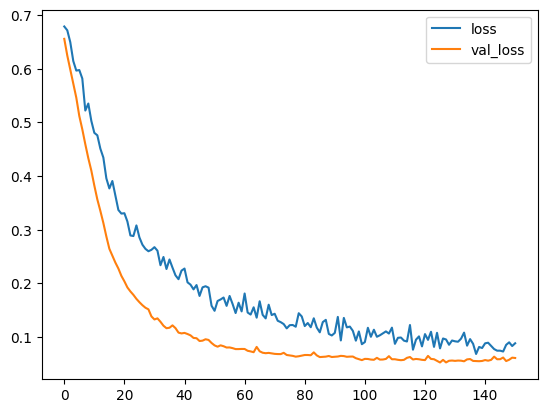

In [31]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [32]:
prediction = (model.predict(x_test) > 0.5).astype('int32')

4/4 [==============================] - 0s 3ms/step


In [33]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [34]:
print(classification_report(y_true=y_test, y_pred=prediction))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



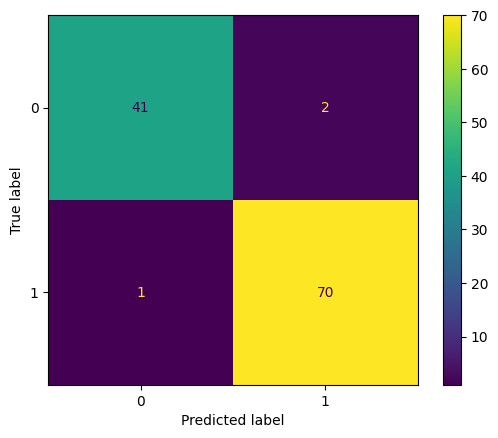

In [35]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=prediction)